### Prototype Flask App

In [53]:
import os
import glob
from copy import deepcopy

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image

from sklearn.metrics.pairwise import cosine_similarity
from keras.models import load_model

%matplotlib inline

Open Relevant Files

In [2]:
# watch_names = pd.read_csv('xception_raw_feature_vectors_names.csv',index_col=0)
# watch_names['file_name'] = [x.split('/')[-1] for x in watch_names['file_name']]

# f_vecs = np.load('xception_raw_feature_vectors.npy')
# f_vec_df = pd.DataFrame(f_vecs, index=[watch_names['file_name']])

In [7]:
watch_names = pd.read_csv('inceptionv3_raw_feature_vectors_names.csv',index_col=0)
watch_names['file_name'] = [x.split('/')[-1] for x in watch_names['file_name']]
watch_names = watch_names[:-1]

f_vecs = np.load('inceptionv3_raw_feature_vectors.npy')
f_vec_df = pd.DataFrame(f_vecs, index=[watch_names['file_name']])

In [8]:
watch_df = pd.read_csv('all_watch_info_with_indicators.csv')

In [9]:
np.shape(f_vecs)

(10456, 2048)

Compute Cosine Similarities

In [10]:
dists = cosine_similarity(f_vecs) 

In [11]:
np.shape(dists)

(10456, 10456)

In [12]:
dist_df = pd.DataFrame(data = dists)

In [13]:
dist_df.index = watch_names['file_name'].iloc[:]
dist_df.columns = watch_names['file_name'].iloc[:]

Function for finding n closest matches

In [14]:
def get_similar(watchs, n=None):
    """
    calculates which watchs are most similar to the watchs provided. Does not return
    the watchs that were provided
    
    Parameters
    ----------
    watchs: list
        some watchs!
    
    Returns
    -------
    ranked_watchs: list
        rank ordered watchs
    """
    watchs = [watch for watch in watchs if watch in dist_df.columns]
    watchs_summed = dist_df[watchs].apply(lambda row: np.sum(row), axis=1)
    watchs_summed = watchs_summed.sort_values(ascending=False)
    ranked_watchs = watchs_summed.index[watchs_summed.index.isin(watchs)==False]
    ranked_watchs = ranked_watchs.tolist()
    if n is None:
        return ranked_watchs
    else:
        return ranked_watchs[:n]

Random Image from Watch store Database

In [15]:
f_path = 'all_pics/'
f_list = os.listdir(f_path)

(-0.5, 248.5, 399.5, -0.5)

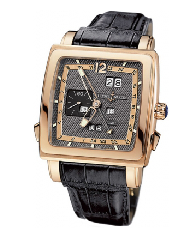

In [16]:
starting_name = np.random.choice(f_list)
img=mpimg.imread(f_path + starting_name)
imgplot = plt.imshow(img)
plt.axis('off')

Recommendations

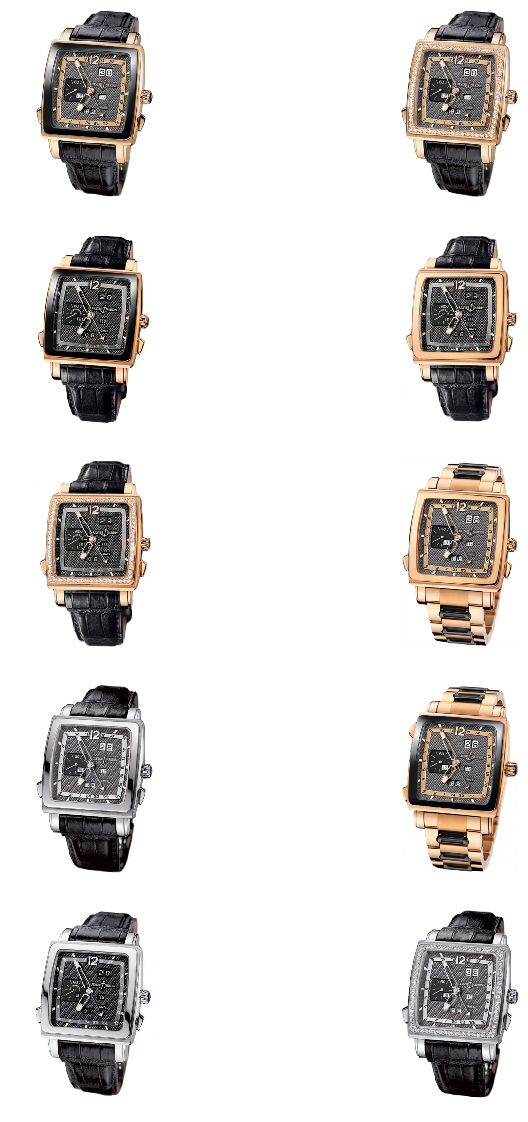

In [17]:
n = 10
recommend_names = get_similar([starting_name],n=n)

r = int(np.ceil(n/2))
c = 2
plt.subplots(nrows=r, ncols=c,figsize=(12,20))

for ix, f_name in enumerate(recommend_names):
    plt.subplot(r,c,ix+1)
    img=mpimg.imread(f_path + f_name.split('/')[-1])
    imgplot = plt.imshow(img)
    plt.axis('off')

__What if the image isn't perfect__

First Load Model

In [31]:
#model = load_model('xception_raw_2048.h5')
model = load_model('inceptionv3_raw_2048.h5')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [44]:
def prepare_image(image_name):
    im_watch = Image.open(image_name)
    im_watch = im_watch.resize((299,299))
    im_watch_array = np.array(im_watch)/255
    im_watch_array = np.expand_dims(im_watch_array, axis=0)
    
    return im_watch_array

In [45]:
#img = prepare_image(f_path+starting_name)

In [46]:
test_path = 'test_pics/'
test_files = os.listdir(test_path)

In [47]:
#test_files

In [48]:
#test_file = test_path + np.random.choice(test_files)
#test_file = test_path + 'blogger-image--2007922873.jpg' #
#test_file = test_path +'Bulgari-Octo-Finissimo-Automatic-Thinnest-Titanium-Sand-Blasted-2017-aBlogtoWatch-22.jpg'
test_file = test_path +'cocktail_watch.JPG'
#test_file = test_path +'james_bonds_wrist.png'
#test_file = test_path +'ga054-omega-seamaster-planet-ocean-skyfall.jpg'

(-0.5, 719.5, 479.5, -0.5)

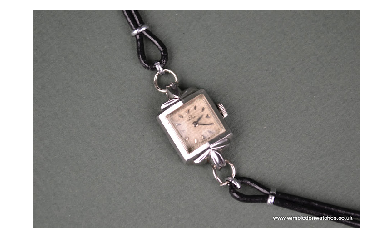

In [49]:
img2show=mpimg.imread(test_file)
imgplot = plt.imshow(img2show)
plt.axis('off')

__match_df__

In [54]:
is_gold = 0
is_silver = 1
is_square = 0
is_round = 0
is_chronograph = 0
is_male = 0

good_rows =  watch_df.loc[(watch_df['is_gold'] == is_gold) & \
            (watch_df['is_silver'] == is_silver) &\
            (watch_df['is_square'] == is_square) &\
            (watch_df['is_round'] == is_round) &\
            (watch_df['is_chronograph'] == is_chronograph) &\
            (watch_df['is_male'] == is_male)]

In [55]:
good_rows = deepcopy(good_rows)
good_recs = [x + '.jpg' for x in good_rows['image_name']]

In [56]:
img = prepare_image(test_file)
out = model.predict(img)

In [57]:
f_vec_df_reduced = f_vec_df.loc[f_vec_df.index.isin(good_recs),:]

In [58]:
similarities = cosine_similarity(out,np.array(f_vec_df_reduced)) 
top_matches = np.array(similarities).argpartition(-n)[0][-n:]
recommend_names = f_vec_df_reduced.index[top_matches]

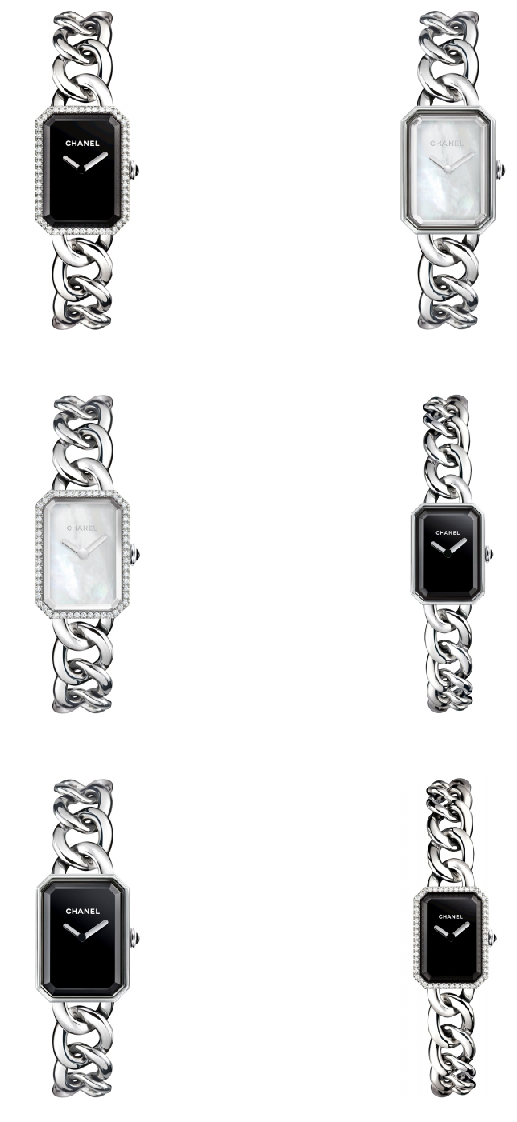

In [59]:
n_recs = 6
r = int(np.ceil(n_recs/2))
c = 2
plt.subplots(nrows=r, ncols=c,figsize=(12,20))

for ix, f_name in enumerate(recommend_names[:n_recs]):
    plt.subplot(r,c,ix+1)
    img=mpimg.imread(f_path + f_name)
    imgplot = plt.imshow(img)
    plt.axis('off')

__Simple Ref__

In [62]:
similarities = cosine_similarity(out,np.array(f_vecs)) 
top_matches = np.array(similarities).argpartition(-n)[0][-n:]
recommend_names = f_vec_df.index[top_matches]

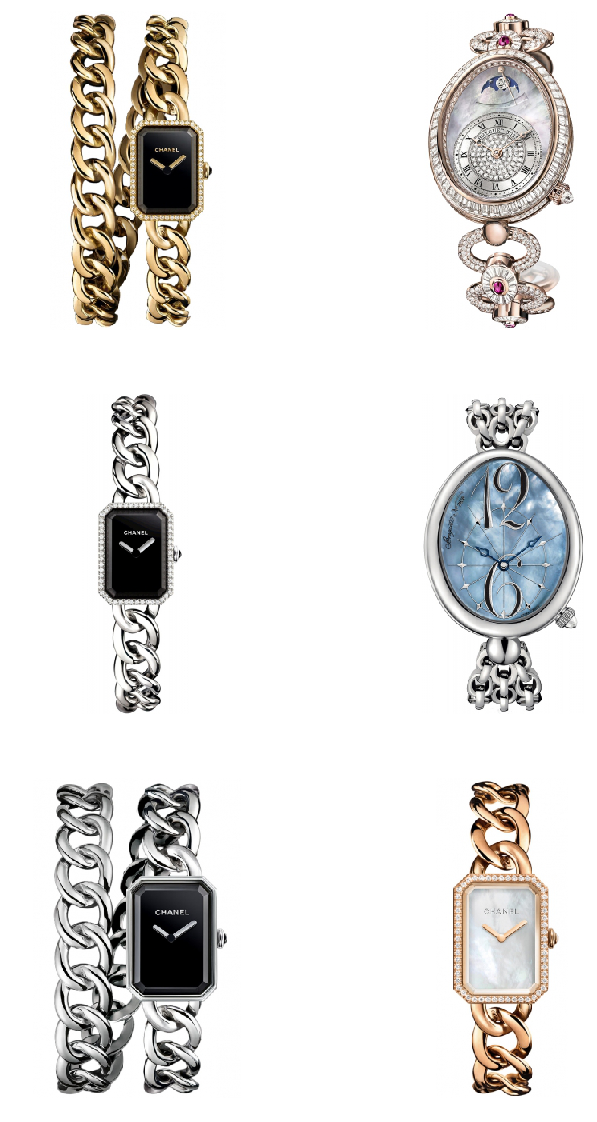

In [63]:
n_recs = 6
r = int(np.ceil(n_recs/2))
c = 2
plt.subplots(nrows=r, ncols=c,figsize=(12,20))

for ix, f_name in enumerate(recommend_names[:n_recs]):
    plt.subplot(r,c,ix+1)
    img=mpimg.imread(f_path + f_name)
    imgplot = plt.imshow(img)
    plt.axis('off')